# **Determining Key Factors influencing Cost of treatment using Linear Regression**

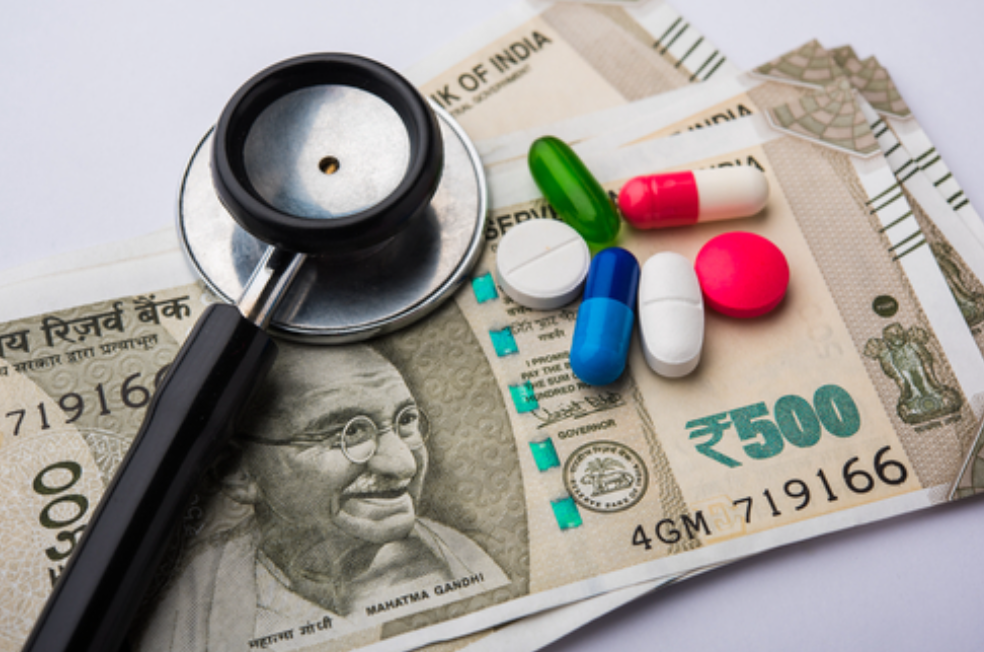

**Importing Libraries**

In [5]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Importing Dataset**

In [6]:
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')

# **Data Overview**

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Visualization

**Age Distribution**

<Axes: xlabel='age', ylabel='Count'>

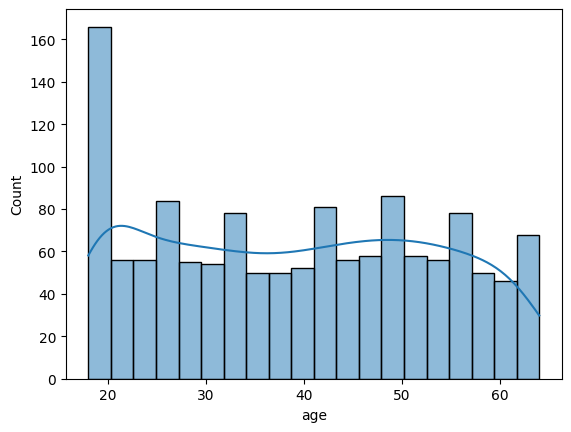

In [21]:
sns.histplot(x = 'age', data = df, bins = 20, kde = True)

**Gender Distribution**

Text(0, 0.5, '')

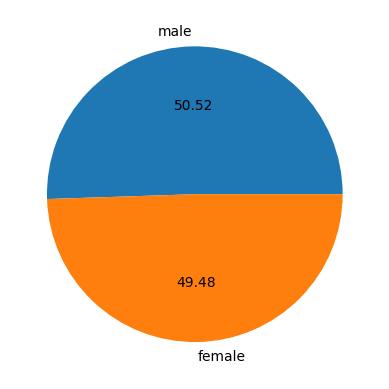

In [24]:
df['sex'].value_counts().plot(kind = 'pie', autopct = '%.2f')
plt.ylabel(None)

**BMI distribution among Male-Female**

<Axes: xlabel='bmi', ylabel='Count'>

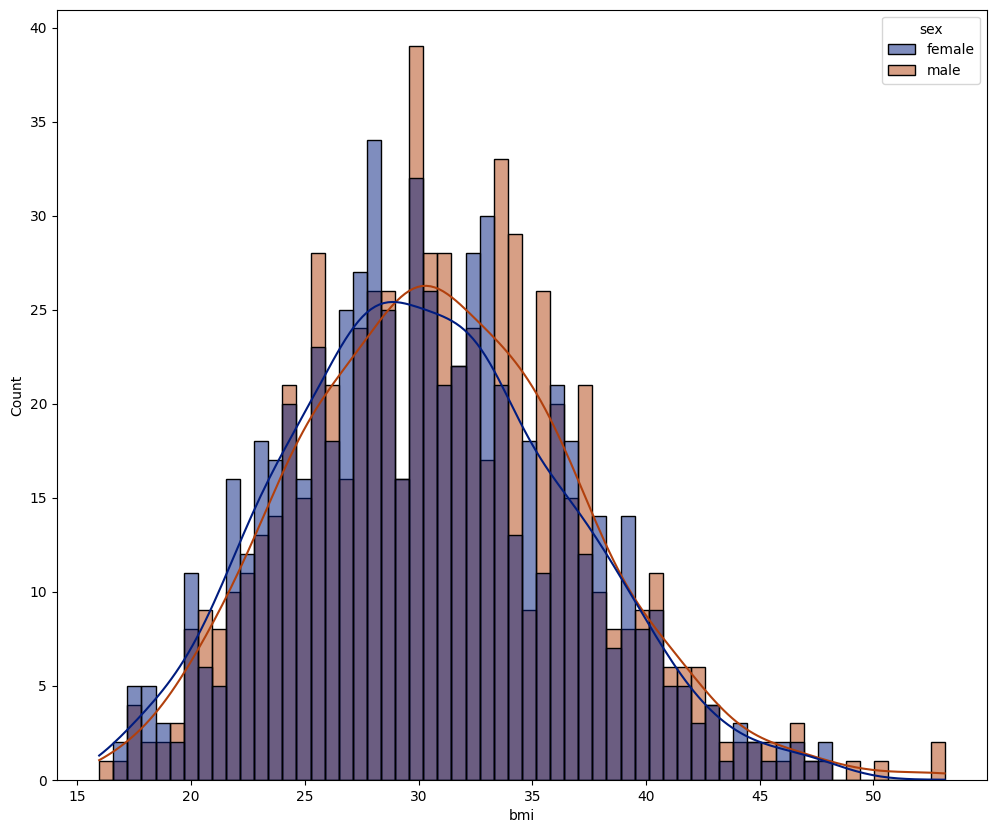

In [31]:
plt.figure(figsize=(12,10))
sns.histplot(x = 'bmi', data = df, bins = 60, kde = True,hue = 'sex', palette = 'dark')

# **Descriptive Statistics**

**BMI for smoker vs non smoker**

<Axes: xlabel='smoker', ylabel='bmi'>

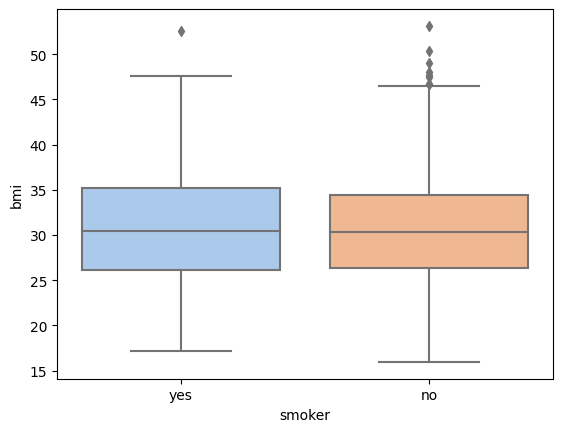

In [54]:
sns.boxplot(x = 'smoker', y = 'bmi', data = df, palette = 'pastel')

**BMI wrt to gender**

<Axes: xlabel='sex', ylabel='bmi'>

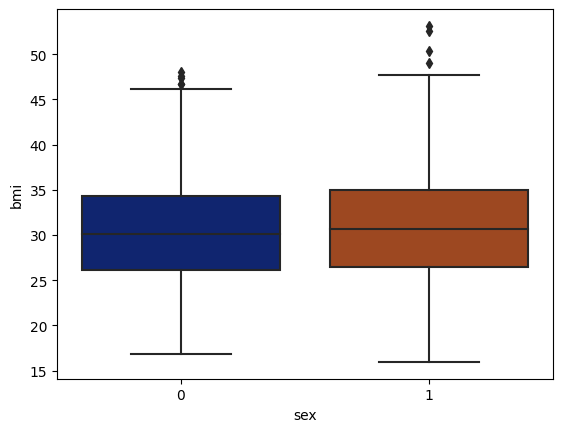

In [45]:
sns.boxplot(x = 'sex', y = 'bmi', data = df, palette = 'dark')

**BMI wrt to region**

<Axes: xlabel='region', ylabel='bmi'>

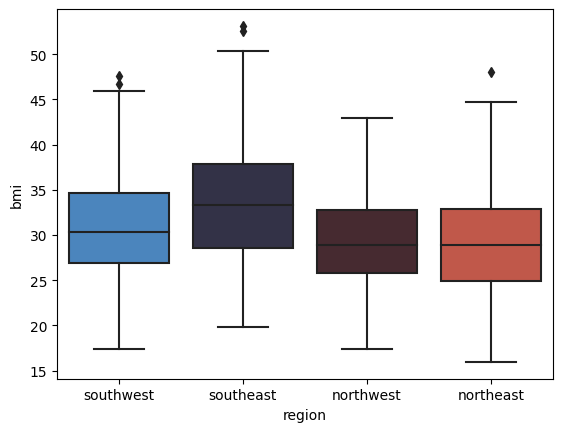

In [53]:
sns.boxplot(x = 'region', y = 'bmi', data = df, palette = 'icefire')

**Gender wise avg cost for treatment**

<Axes: ylabel='sex'>

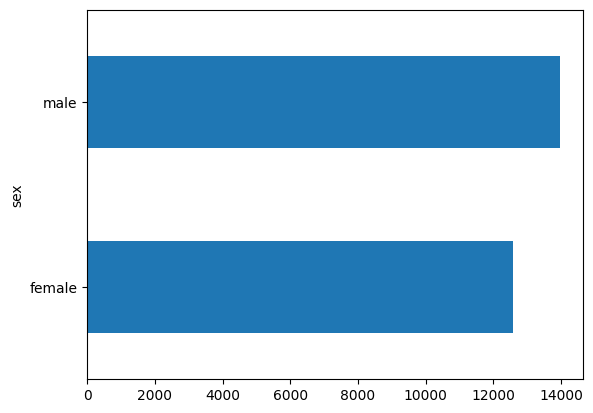

In [57]:
df.groupby('sex')['charges'].mean().plot(kind = 'barh')

# **Converting categorical Variable**

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
enc = LabelEncoder()
df['sex']=enc.fit_transform(df['sex'])
df['smoker']=enc.fit_transform(df['smoker'])
df['region']=enc.fit_transform(df['region'])

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# **Correlation Heatmap**

In [48]:
df.corr()['charges']

age         0.299008
sex         0.057292
bmi         0.198341
children    0.067998
smoker      0.787251
region     -0.006208
charges     1.000000
Name: charges, dtype: float64

<Axes: >

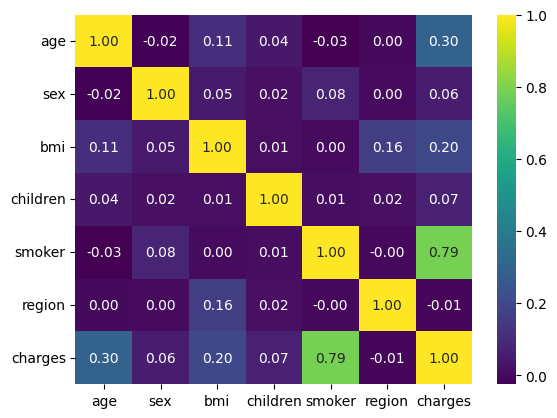

In [49]:
sns.heatmap(df.corr(), annot = True, cmap = 'viridis', fmt = '.2f')

we can observe a significantly high positive correlation between smoker and charges.
Which indicates there is a high likelyhood that for smokers the cost of treatment is more 

In [14]:
#feature target selection
x = df.drop('charges', axis = 1)
y = df['charges']

# **Standardizing the features**

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
for col in x.columns:
    x[col] = scaler.fit_transform(x[[col]])

In [22]:
# after standardization
x.head()

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915


# **Linear Regression analysis**

*Method used : Ordinary Least Squares(OLS)*

In [23]:
import statsmodels.formula.api as smf

In [26]:
model = smf.ols('charges ~ age + sex + bmi + children + smoker + region', data=df)
results = model.fit()

In [28]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Fri, 30 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:35:24   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.182e+04    955.130    -12.371      0.0

# Interpretation Regression Results:

#### 1. **R-squared and Adjusted R-squared**:
- **R-squared: 0.751**: This means that approximately 75.1% of the variability in the dependent variable (`charges`) is explained by the independent variables in the model.
- **Adjusted R-squared: 0.750**: This is a slightly adjusted version of the R-squared that accounts for the number of predictors in the model. It's close to the R-squared value, indicating that adding more variables has not significantly reduced the model's explanatory power.

#### 2. **F-statistic and Prob(F-statistic)**:
- **F-statistic: 668.1** and **Prob(F-statistic): 0.00**: The F-statistic tests whether at least one of the independent variables is statistically significant in explaining the variability of the dependent variable. The very low p-value (0.00) indicates that the overall model is statistically significant.

#### 3. **Coefficients**:
- **Intercept: -11820.4**: The intercept represents the expected value of `charges` when all independent variables are zero. In this context, it's more of a reference point rather than having a meaningful real-world interpretation.
- **age: 257.2881**: For each unit increase in the standardized age variable, `charges` are expected to increase by approximately 257.29 units, holding all else constant. The p-value is 0.000, indicating this coefficient is highly statistically significant.
- **sex: -131.1106**: The coefficient for `sex` is not statistically significant (p-value = 0.694), suggesting that the sex variable does not have a meaningful impact on `charges` in this model.
- **bmi: 332.5701**: A unit increase in BMI is associated with an increase in `charges` by approximately 332.57 units. This is statistically significant with a p-value of 0.000.
- **children: 479.3694**: Each additional child is associated with an increase in `charges` by approximately 479.37 units. This is also statistically significant (p-value = 0.000).
- **smoker: 2382.0**: Being a smoker is associated with an increase in `charges` by approximately 2382 units. The extremely low p-value (0.000) indicates this is a very strong predictor of `charges`.
- **region: -353.6400**: The region variable is negatively associated with `charges`, suggesting that depending on the region, charges decrease by approximately 353.64 units. The p-value of 0.020 indicates statistical significance, though the effect size is smaller compared to other variables.

#### 4. **t-statistics and P-values**:
- Each coefficient's t-statistic tests whether the coefficient is significantly different from zero. 
- **P>|t|** shows the p-value for each t-test. A p-value less than 0.05 typically indicates statistical significance.
- For example, age, BMI, children, and smoker have p-values well below 0.05, indicating strong evidence against the null hypothesis (i.e., these coefficients are statistically significant).

#### 5. **Confidence Intervals [0.025, 0.975]**:
- These intervals give the range within which we expect the true coefficient values to lie with 95% confidence.
- For example, the coefficient for age has a 95% confidence interval between 233.971 and 280.605, meaning we can be 95% confident that the true impact of age on charges falls within this range.

#### 6. **Diagnostic Metrics**:
- **Omnibus: 299.003 and Prob(Omnibus): 0.000**: This tests the normality of residuals. A p-value of 0.000 suggests that the residuals are not normally distributed.
- **Durbin-Watson: 2.088**: This statistic tests for autocorrelation in the residuals. A value around 2 suggests there is no autocorrelation.
- **Jarque-Bera (JB): 713.975** and **Prob(JB): 0.000**: This also tests normality, where a significant p-value indicates non-normality.
- **Cond. No: 296**: This indicates potential multicollinearity if the value is very large. A value of 296 suggests mild multicollinearity, but it's not severe.

### Key Insights:
- **Significant Predictors**: Age, BMI, number of children, and smoking status are significant predictors of charges.
- **Smoker Effect**: Being a smoker has the largest positive effect on charges.
- **Region Impact**: Region also has a statistically significant but smaller negative impact on charges.
- **Model Fit**: The model explains 75.1% of the variability in charges, indicating a good fit, but there may be some issues with normality in the residuals.

This interpretation should provide a comprehensive understanding of your regression analysis. If you have any specific aspects you'd like to delve deeper into, feel free to ask!

**Age and BMI effect on charges**

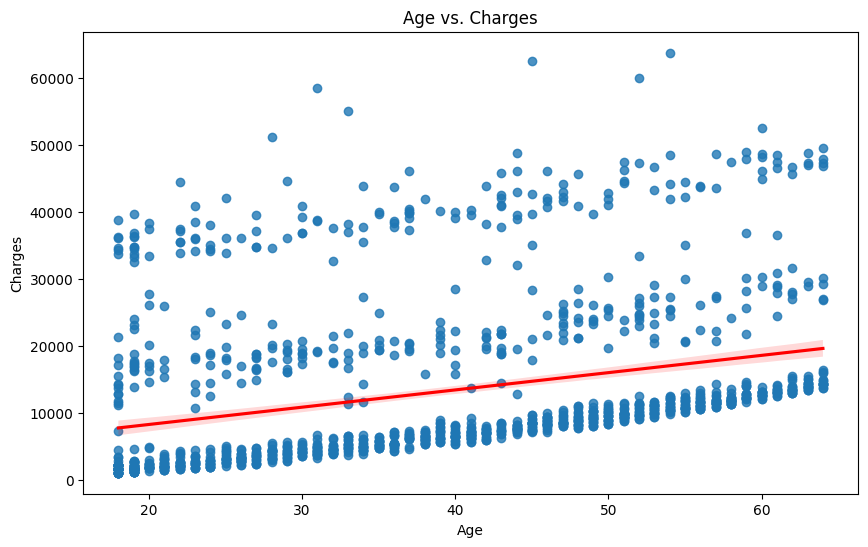

In [57]:
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='charges', data=df, line_kws={"color": "red"})
plt.title('Age vs. Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

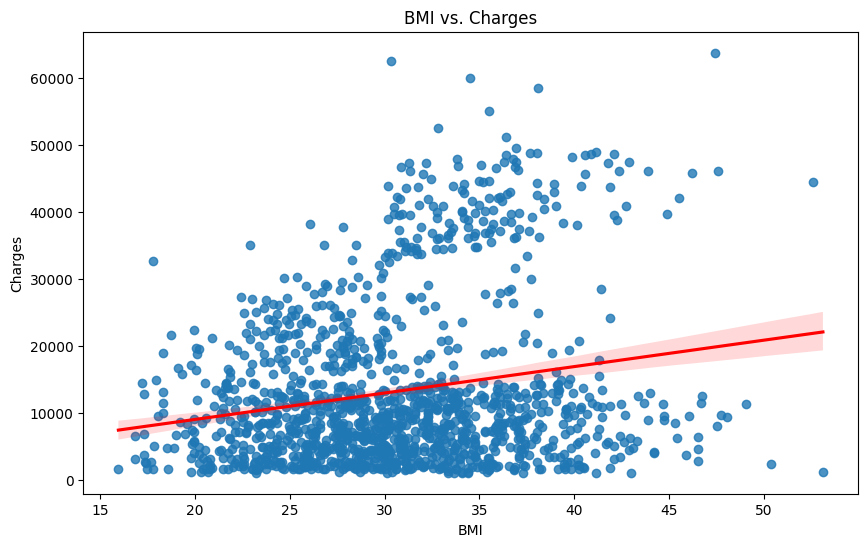

In [58]:
plt.figure(figsize=(10, 6))
sns.regplot(x='bmi', y='charges', data=df, line_kws={"color": "red"})
plt.title('BMI vs. Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

# **homoscedasticity (constant variance of residuals)**

In [31]:
fitted_values = results.fittedvalues  # The predicted charges from the model
residuals = results.resid  # The residuals (actual - predicted)

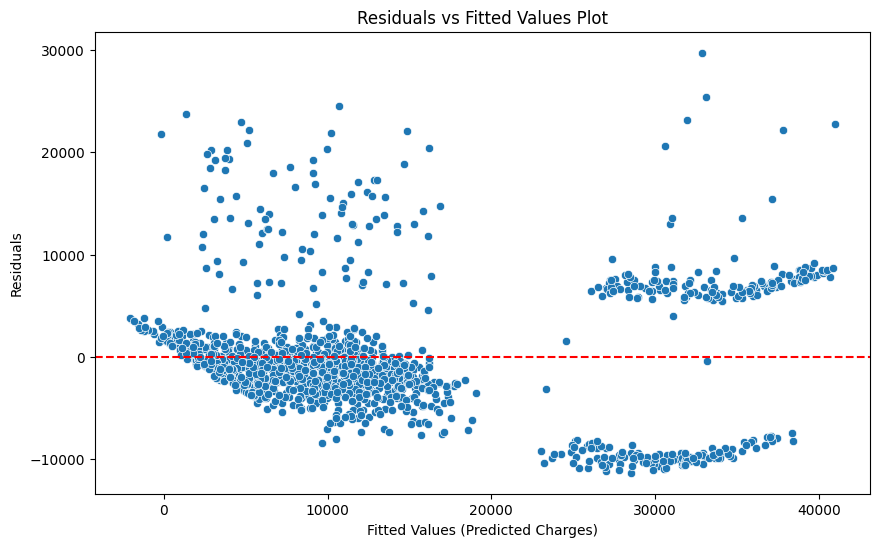

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0, color='red', linestyle='--')

# Adding labels and title
plt.xlabel('Fitted Values (Predicted Charges)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values Plot')
plt.show()

# Splitting the data for training and testing

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [39]:
x_train.shape,x_test.shape

((1070, 6), (268, 6))

# Training the Model

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [49]:
lr = LinearRegression(n_jobs=10)
lr.fit(x_train,y_train)

LinearRegression(n_jobs=10)

In [50]:
#making predictions
y_pred = lr.predict(x_test)

# Evaluation

In [51]:
#mae
mean_absolute_error(y_test,y_pred)

4186.508898366437

In [52]:
#mse
mean_squared_error(y_test,y_pred)

33635210.43117845

In [53]:
#rmse
(mean_squared_error(y_test,y_pred))**0.5

5799.5870914383595

# **Prediction**

In [59]:
x_test

,age,sex,bmi,children,smoker,region
764,0.412467,-1.010519,-0.900341,0.751079,-0.507463,-1.372326
887,-0.228344,-1.010519,-0.105546,-0.908614,-0.507463,-0.466915
890,1.765289,-1.010519,-0.619825,-0.908614,1.970587,-0.466915
1293,0.483668,0.989591,-0.806836,1.580926,-0.507463,-0.466915
259,-1.438764,0.989591,0.206139,-0.908614,1.970587,-0.466915
...,...,...,...,...,...,...
109,1.694088,0.989591,0.726160,-0.908614,1.970587,0.438495
575,1.338082,-1.010519,-0.573072,-0.908614,-0.507463,-0.466915
535,-0.085942,0.989591,-0.432814,-0.078767,-0.507463,-1.372326
543,1.053277,-1.010519,2.747188,-0.908614,1.970587,0.438495


**lest take a observation from the test set : index 575**

In [72]:
input_observation = np.array([1.338082, -1.010519, -0.573072, -0.908614, -0.507463, -0.466915]).reshape(1, -1)

In [73]:
predicted_charges = lr.predict(input_observation)
print(predicted_charges)

[11814.55659245]


In [84]:
y_test.reset_index()

,index,charges
0,764,9095.06825
1,887,5272.17580
2,890,29330.98315
3,1293,9301.89355
4,259,33750.29180
...,...,...
263,109,47055.53210
264,575,12222.89830
265,535,6067.12675
266,543,63770.42801


**as we can see the charges for index 575 is 12222.89830**

so the residual = Y(actual) - Y(predicted)

In [86]:
E = 12222.89830 - 11814.55659245
E

408.34170755000014